In [10]:
%pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


In [9]:

df = pd.read_csv("../data/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.info()
# Verificando a distribuição de classes na coluna 'Outcome'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
# Verificando valores ausentes por coluna
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
# Verificando registros duplicados
print(f"Registros duplicados: {df.duplicated().sum()}")



Registros duplicados: 0


In [20]:

# Estatísticas descritivas
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:


# Quantidade de linhas duplicadas
duplicados = df.duplicated().sum()
print(f"Quantidade de linhas duplicadas: {duplicados}\n")

Quantidade de linhas duplicadas: 0



In [43]:
# Valores nulos por coluna (Dict Comprehension)
valores_nulos = {col: df[col].isnull().sum() for col in df.columns}
valores_nulos_json = json.dumps({k: int(v) for k, v in valores_nulos.items()}, indent=4, sort_keys=True)
print(f"Valores nulos por coluna:\n{valores_nulos_json}\n")

Valores nulos por coluna:
{
    "Age": 0,
    "BMI": 0,
    "BloodPressure": 0,
    "DiabetesPedigreeFunction": 0,
    "Glucose": 0,
    "Insulin": 0,
    "Outcome": 0,
    "Pregnancies": 0,
    "SkinThickness": 0
}



In [48]:
# Valores zero por coluna (Dict Comprehension)
valores_max = {col: (df[col] == 0).sum() for col in df.columns}
valores_zero_json = json.dumps({k: int(v) for k, v in valores_max.items()}, indent=4, sort_keys=True)
print(f"Valores zero por coluna:\n{valores_zero_json}\n")


Valores zero por coluna:
{
    "Age": 0,
    "BMI": 11,
    "BloodPressure": 35,
    "DiabetesPedigreeFunction": 0,
    "Glucose": 5,
    "Insulin": 374,
    "Outcome": 500,
    "Pregnancies": 111,
    "SkinThickness": 227
}



In [53]:
# Pegando o valor máximo de cada coluna do DataFrame
# Utilizando dict comprehension para garantir que o valor seja int (quando possível)
valores_minimos = {col: int(df[col].max()) if np.issubdtype(df[col].dtype, np.number) else str(df[col].max()) for col in df.columns}

# Convertendo para JSON para melhor visualização
valores_maximos_json = json.dumps(valores_minimos, indent=4, sort_keys=True)

# Exibindo o resultado
print(f"Valores máximos por coluna:\n{valores_maximos_json}\n")

Valores máximos por coluna:
{
    "Age": 81,
    "BMI": 67,
    "BloodPressure": 122,
    "DiabetesPedigreeFunction": 2,
    "Glucose": 199,
    "Insulin": 846,
    "Outcome": 1,
    "Pregnancies": 17,
    "SkinThickness": 99
}



In [54]:
# Pegando o valor máximo de cada coluna do DataFrame
# Utilizando dict comprehension para garantir que o valor seja int (quando possível)
valores_minimos = {col: int(df[col].min()) if np.issubdtype(df[col].dtype, np.number) else str(df[col].min()) for col in df.columns}

# Convertendo para JSON para melhor visualização
valores_minimos_json = json.dumps(valores_minimos, indent=4, sort_keys=True)

# Exibindo o resultado
print(f"Valores máximos por coluna:\n{valores_minimos_json}\n")

Valores máximos por coluna:
{
    "Age": 21,
    "BMI": 0,
    "BloodPressure": 0,
    "DiabetesPedigreeFunction": 0,
    "Glucose": 0,
    "Insulin": 0,
    "Outcome": 0,
    "Pregnancies": 0,
    "SkinThickness": 0
}



In [45]:
# Tipos de dados de cada coluna (Dict Comprehension)
tipos_dados = {col: dtype for col, dtype in df.dtypes.items()}
tipos_dados_json = json.dumps({k: str(v) for k, v in tipos_dados.items()}, indent=4, sort_keys=True)
print(f"Tipos de dados de cada coluna:\n{tipos_dados_json}\n")

Tipos de dados de cada coluna:
{
    "Age": "int64",
    "BMI": "float64",
    "BloodPressure": "int64",
    "DiabetesPedigreeFunction": "float64",
    "Glucose": "int64",
    "Insulin": "int64",
    "Outcome": "int64",
    "Pregnancies": "int64",
    "SkinThickness": "int64"
}



In [47]:
# Estatísticas descritivas
estatisticas = df.describe()
# Impressão dos resultados
print(f"Estatísticas descritivas do dataset:\n{estatisticas}\n")

Estatísticas descritivas do dataset:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951 

### Analise inicial

- **Sem valores duplicados ou ausentes** na base de dados (aparentemente).
- **Gravidez**: média de 3,84 gestações, com máximo de 17.
- **Glicose**: média de 120,89. Valor mínimo de 0 é irreal, indicando dados ausentes ou incorretos.
- **Pressão arterial**: média de 69,10. Valor zero também é inválido.
- **Espessura da pele**: média de 20,54. Registros com valor 0 são considerados incorretos.
- **Insulina**: média de 79,80. Vários registros com 0 indicam dados faltantes.
- **IMC (Índice de Massa Corporal)**: média de 31,99. Valores 0 são implausíveis.
- **Função hereditária de diabetes**: média de 0,47.
- **Idade**: média de 33,24 anos.
- **Diabetes (variável alvo)**: cerca de 34,9% dos pacientes têm diabetes.



##  **To-Do List: Análise e Pré-processamento do Dataset de Diabetes**

###  **1. Verificar e tratar valores inválidos (zeros que representam dados ausentes)**

* [X] Identificar colunas com valores 0 inválidos:

  * `Glucose`
  * `BloodPressure`
  * `SkinThickness`
  * `Insulin`
  * `BMI`
* [X] Substituir os valores 0 por:
  * [X] Subsituir pon `NAN`
  * [ ] Mediana geral da coluna
  * [ ] mediana separada por classe (`Outcome`)
  * [ ] usar técnica de imputação avançada (ex: KNN, MICE)

---

###  **2. Análise de distribuição e outliers**

* [X] Plotar histogramas para verificar a distribuição das variáveis
* [X] Usar boxplots para detectar outliers
* [X] Calcular skewness e kurtosis (assimetria e achatamento)

---

###  **3. Análise por classe (`Outcome`)**

* [ ] Verificar a distribuição de classes (`0` vs `1`) com gráfico de barras
* [ ] Gerar `describe()` agrupado por `Outcome`:

  ```python
  df.groupby('Outcome').describe()
  ```
* [ ] Analisar como `Age`, `Glucose`, `BMI`, etc., se comportam entre diabéticos e não diabéticos

---

###  **4. Matriz de correlação**

* [ ] Gerar e analisar matriz de correlação com `df.corr()`
* [ ] Visualizar como heatmap (ex: com seaborn)
* [ ] Verificar correlação entre variáveis e com `Outcome`

---

### **5. Engenharia de atributos**

* [ ] Criar faixas etárias (ex: `<30`, `30–50`, `>50`)
* [ ] Categorizar IMC (IMC < 25: normal, 25–30: sobrepeso, >30: obeso)
* [ ] Criar variável binária indicando se o valor original era 0 (ex: `Glucose_was_zero`)
* [ ] Criar novas relações entre atributos (ex: razão entre `Insulin` e `Glucose`)

---

### **6. Normalização/Escalonamento**

* [ ] Aplicar `StandardScaler` ou `MinMaxScaler` em variáveis numéricas, especialmente:

  * `Glucose`, `Insulin`, `BMI`, `Age`, etc.
* [ ] Avaliar impacto nos modelos que usam distância (KNN, SVM)

---

### **7. Preparação para modelagem**

* [ ] Dividir o dataset em treino e teste
* [ ] Lidar com o desbalanceamento da variável `Outcome` (se for treinar modelo):

  * [ ] Usar técnicas como `SMOTE`, `class_weight='balanced'`, etc.
* [ ] Escolher métricas adequadas para avaliação:

  * Precisão, Recall, F1-score, AUC

---



### 1. Verificar e tratar valores inválidos (zeros que representam dados ausentes)**


1.1 Identificar colunas com valores 0 inválidos:

  * `Glucose`
  * `BloodPressure`
  * `SkinThickness`
  * `Insulin`
  * `BMI`

In [56]:
# Lista das colunas que queremos analisar
colunas_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Dict comprehension para contar zeros em cada coluna
quantidade_zeros = {col: int((df[col] == 0).sum()) for col in colunas_zeros}

print(f"Quantidade de valores zero por coluna:\n{quantidade_zeros}")

Quantidade de valores zero por coluna:
{'Glucose': 5, 'BloodPressure': 35, 'SkinThickness': 227, 'Insulin': 374, 'BMI': 11}


Substituir os valores 0 por:

  * [X] Subistituir por `NAN`
  * [ ] Mediana geral da coluna
  * [ ] Mediana separada por classe (`Outcome`)
  * [ ] Usar técnica de imputação avançada (ex: KNN, MICE)
  
Substituir valores inválidos por `NaN`

Vantagens:
- Permite aplicar métodos de imputação mais flexíveis depois (ex: média, mediana, KNN, regressão).
- Facilita análises estatísticas sobre quantos valores estão realmente ausentes.
- Evita suposições prematuras sobre qual é o valor ideal para preencher.

In [59]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)


In [60]:
quantidade_zeros = {col: int((df[col] == 0).sum()) for col in colunas_zeros}

print(f"Quantidade de valores zero por coluna:\n{quantidade_zeros}")

Quantidade de valores zero por coluna:
{'Glucose': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0}


In [61]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pregnancies (Gestações)
 - Média: 3.85 | Desvio padrão: 3.37 | Máx: 17
 - Distribuição bastante dispersa.
 - Algumas mulheres têm até 17 gestações — possível outlier, mas realista em certos contextos

Glucose (Glicose)
 - Média: 121.69 | Desvio padrão: 30.54 | Mínimo: 44
 - Após exclusão de zeros, os valores ficaram mais realistas.
 - A distribuição segue centrada em torno de 120, mas há bastante variação.

BloodPressure (Pressão arterial)
 - Média: 72.4 | Desvio padrão: 12.38 | Mínimo: 24
 - 35 registros faltantes foram removidos ou marcados como ausentes.
 - Média ligeiramente superior à análise anterior (69 → 72), o que mostra que os zeros estavam puxando a média para baixo.

SkinThickness (Espessura da pele)
 - Média: 29.15 | Desvio padrão: 10.48 | Count: 541 (227 ausentes!)
 - Alta taxa de valores ausentes (29% do total).
 - Média e mediana próximas (29), sugerindo distribuição simétrica.

Insulin (Insulina)
 - Média: 155.55 | Desvio padrão: 118.78 | Máx: 846 | Count: 394 (apenas 51% preenchido!)
 - Variável altamente assimétrica e incompleta.
 - Grande desvio padrão e valores extremos.

BMI (Índice de Massa Corporal)
 - Média: 32.46 | Desvio padrão: 6.92
 - Agora sem zeros, a média subiu levemente (31.99 → 32.46), o que é esperado.
 - Valores mínimos e máximos realistas (18.2 a 67.1)

DiabetesPedigreeFunction
 - Média: 0.47 | Desvio padrão: 0.33 | Máx: 2.42 
 - Sem mudanças em relação à análise anterior. 
 - Valores estão dentro de uma faixa esperada.

Age (Idade)
 - Média: 33.24 | Desvio padrão: 11.76 | Máx: 81
 - Distribuição com assimetria leve (mediana < média). 
 - A maior parte está entre 20 e 50 anos.

Outcome (Diabetes)
 - Proporção: 34,9% dos pacientes com diabetes (valor igual ao anterior) 
 - Classe desbalanceada: cerca de 1/3 da amostra.

### 2. Análise de distribuição e outlier

#### Plotar histogramas para verificar a distribuição das variáveis

O trecho de código abaixo utiliza o Matplotlib e o Seaborn para criar uma visualização exploratória dos dados do DataFrame, plotando histogramas para várias colunas ao mesmo tempo. 

1. A função plt.figure(figsize=(16, 12)) inicializa uma nova figura com um tamanho grande, ideal para acomodar múltiplos gráficos. 
2. Em seguida, o laço for i, col in enumerate(cols): percorre a lista de colunas (cols), atribuindo a cada coluna um índice i e o nome da coluna col.
3. Dentro do laço, plt.subplot(3, 3, i + 1) cria uma grade de subplots com 3 linhas e 3 colunas, posicionando cada histograma em uma célula diferente da grade. 
4. O comando sns.histplot(data=df, x=col, kde=True, bins=30, color='skyblue') plota o histograma da coluna atual, utilizando 30 bins e adicionando uma curva de densidade (KDE) para facilitar a visualização da distribuição dos dados. 
5. O restante do código adiciona título e rótulos aos eixos de cada subplot, utilizando f-strings para personalizar o texto com o nome da coluna.
6. Por fim, plt.tight_layout() ajusta automaticamente o espaçamento entre os subplots para evitar sobreposição de elementos, 
7. e plt.show() exibe a figura completa. 



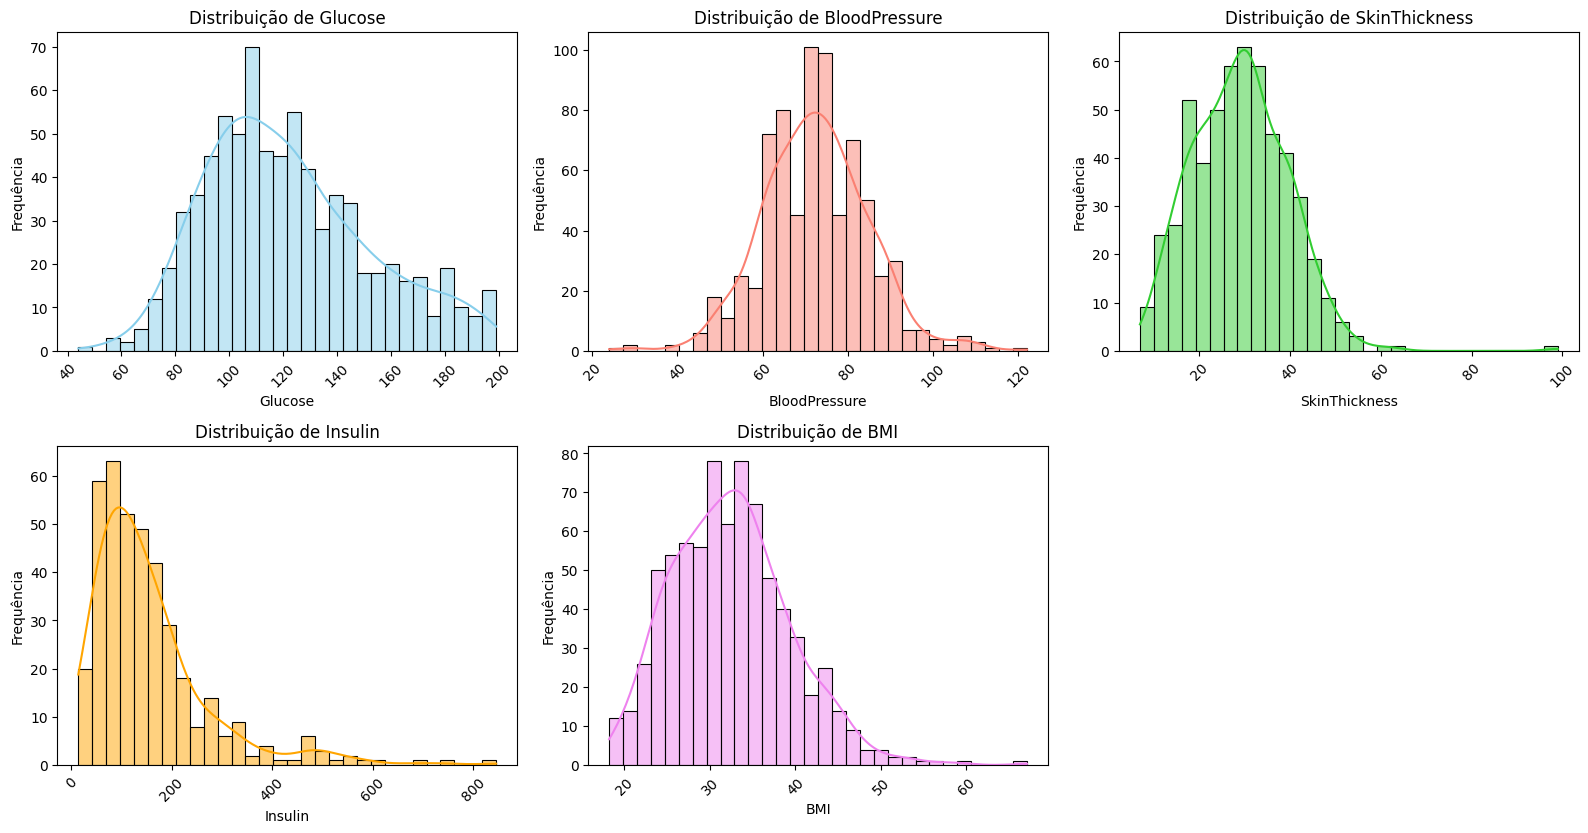

In [65]:
# Lista de cores para cada gráfico
cores = ['skyblue', 'salmon', 'limegreen', 'orange', 'violet']

plt.figure(figsize=(16, 12))
for i, col in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    plt.xticks(rotation=45)
    # Seleciona a cor correspondente à coluna
    sns.histplot(data=df, x=col, kde=True, bins=30, color=cores[i])
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


 #### Usar boxplots para detectar outliers

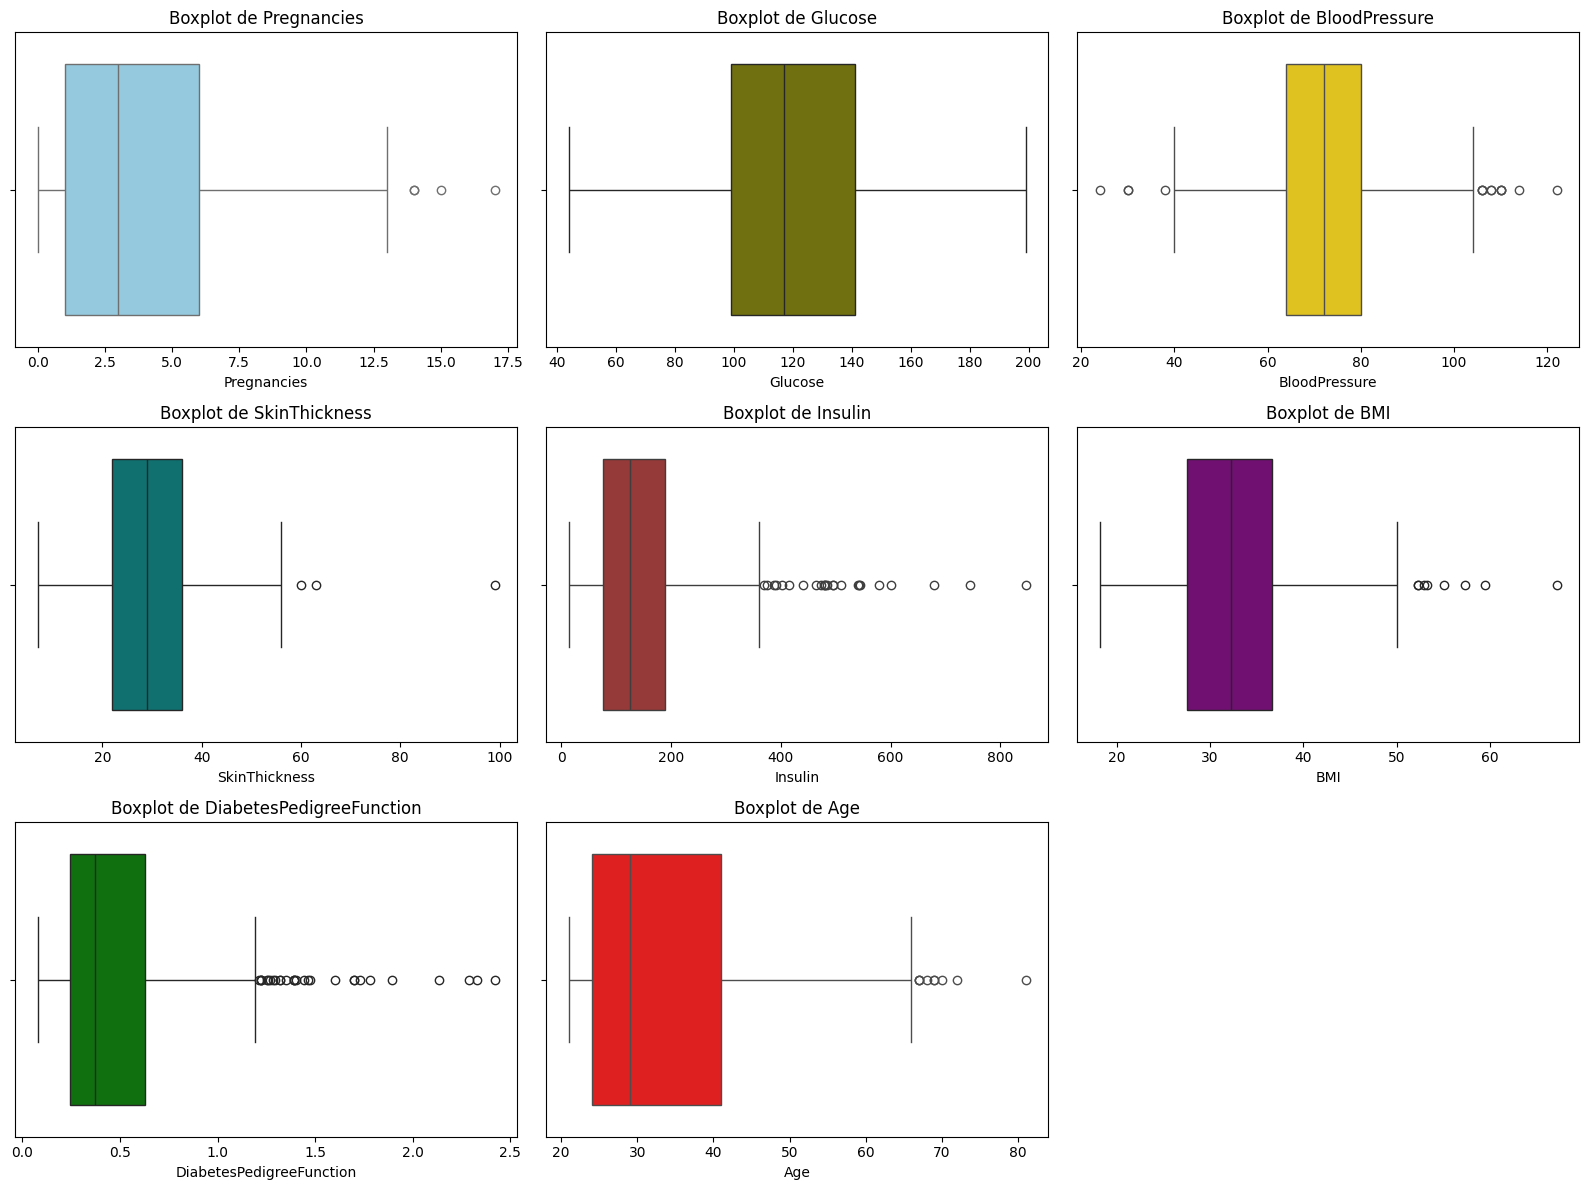

In [ ]:
# Define uma lista de colunas numéricas (numeric_cols) e uma lista de cores (lst_col).
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
lst_col=['skyblue','olive','gold','teal','brown','purple','green','red','blue']

# Cria uma figura grande para acomodar vários gráficos.
plt.figure(figsize=(16, 12))

# Usa enumerate e zip para iterar simultaneamente sobre as colunas e as cores, obtendo o índice e os valores.
for i, (col, m) in enumerate(zip(numeric_cols, lst_col)):
    # Para cada coluna, cria um subplot (em uma grade 3x3), desenha um boxplot daquela coluna com a cor correspondente e adiciona um título.
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=col, color=m)
    plt.title(f'Boxplot de {col}')

# Ajusta o espaçamento entre os subplots para evitar sobreposição.
plt.tight_layout()
# exibe todos os gráficos.
plt.show()


Análise de cada gráfico da imagem
1. Pregnancies (Gestações)
 - Mediana por volta de 3.
 - Existem outliers acima de 13 (até 17). 
 - Interpretação: valores altos de gestações são raros, mas possíveis. Não parecem erros.

2. Glucose (Glicose)
 - Mediana em torno de 120.
 - Sem outliers muito extremos — distribuição mais estável após limpeza dos zeros.
 - Interpretação: glicose é uma variável bem distribuída, com valores esperados de 70–180 mg/dL.

3. BloodPressure (Pressão arterial)
 - Mediana ≈ 72. 
 - Outliers abaixo de 40 e acima de 100 mmHg. 
 - Interpretação: pressões muito baixas podem indicar erro ou pacientes em condições críticas.

4. SkinThickness (Espessura da pele)
 - Mediana ≈ 29 mm.
 - Alguns outliers entre 60–100 mm. 
 - Interpretação: valores acima de 60 mm são raros; pode indicar erro de entrada ou perfil atípico.

5. Insulin (Insulina)
 - Mediana ≈ 125.
 - Muitos outliers acima de 300, chegando a mais de 800 µU/mL.
 - Interpretação: distribuição extremamente assimétrica. Ideal fazer transformação logarítmica. Pode haver medições mal calibradas.

6. BMI (Índice de Massa Corporal)
 - Mediana ≈ 32. 
 - Outliers > 50 (até 67). 
 - Interpretação: obesidade grave. Clinicamente possível, mas impacta fortemente a média. Normalizar ou categorizar pode ajudar.

7. DiabetesPedigreeFunction (Histórico familiar de diabetes)
 - Mediana ≈ 0.37.
 - Muitos outliers > 1, chegando até 2.4.
 - Interpretação: valores altos indicam histórico familiar forte. Distribuição é bastante assimétrica.

8. Age (Idade)
 - Mediana ≈ 30 anos.
 - Outliers > 60 (até 81).
 - Interpretação: idades elevadas são reais, mas mais raras no dataset.

Conclusões principais

    - Variáveis como Glucose, BloodPressure e Age têm distribuição mais "comportada".
    - Variáveis como Insulin, DiabetesPedigreeFunction e BMI têm muitos outliers e assimetria.
    - Pode ser necessário:




#### Calcular skewness e kurtosis (assimetria e achatamento)

Mede quão simétrica é a distribuição dos dados:

** Skewness**

- `≈` 0	Distribuição simétrica (normal)
- `>` 0	Assimetria à direita (cauda longa à direita)
- `<` 0	Assimetria à esquerda (cauda longa à esquerda)

** Kurtosis (Curtose)** 
Mede o achatamento da distribuição (a concentração de valores nas caudas):

Kurtosis
- `≈` 3	Distribuição normal (mesocúrtica)
- `>` 3	Caudas pesadas (leptocúrtica – mais outliers)
- `<` 3	Caudas leves (platicúrtica – mais achatada)

In [ ]:


# Lista das colunas numéricas
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Criar um DataFrame com skewness e kurtosis
result = pd.DataFrame(columns=['Skewness', 'Kurtosis'])

for col in cols:
    s = skew(df[col].dropna())       # remover NaNs
    k = kurtosis(df[col].dropna())   # por padrão é "excesso de kurtosis", ou seja: kurt - 3
    result.loc[col] = [s, k]

# Corrigir a kurtosis (adicionando 3 para ter a kurtosis total)
result['Kurtosis'] = result['Kurtosis'] + 3

print(result)


                          Skewness  Kurtosis
Pregnancies               0.899912  3.150383
Glucose                   0.529944  2.716919
BloodPressure             0.133878  3.896780
SkinThickness             0.688703  5.897361
Insulin                   2.158207  9.274775
BMI                       0.592792  3.849771
DiabetesPedigreeFunction  1.916159  8.550792
Age                       1.127389  3.631177




| Variável                     | Skewness | Kurtosis | Interpretação                                                                                                                                      |
| ---------------------------- | -------- | -------- | -------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Pregnancies**              | 0.90     | 3.15     | **Assimétrica à direita**. Algumas pessoas com muitas gestações, mas distribuição relativamente normal. Pode considerar normalizar ou discretizar. |
| **Glucose**                  | 0.53     | 2.72     | **Quase simétrica** (boa). Leve assimetria à direita. Não exige grandes transformações.                                                            |
| **BloodPressure**            | 0.13     | 3.90     | **Muito simétrica** (excelente). Leve curtose alta, mas nada preocupante. Distribuição quase normal.                                               |
| **SkinThickness**            | 0.69     | 5.90     | Assimétrica à direita e **alta curtose** (caudas pesadas). Muitos valores extremos. Pode aplicar log ou transformar.                               |
| **Insulin**                  | 2.16     | 9.27     | **Altamente assimétrica à direita** e com **muitos outliers**. Deve ser transformada (ex: `log1p`). Talvez deva ser padronizada com robust scaler. |
| **BMI**                      | 0.59     | 3.85     | Leve assimetria à direita e leve curtose alta. Possível normalização ou padronização.                                                              |
| **DiabetesPedigreeFunction** | 1.92     | 8.55     | **Muito assimétrica e leptocúrtica** (outliers fortes). Pode distorcer modelos lineares. Recomendável log, sqrt ou binning.                        |
| **Age**                      | 1.13     | 3.63     | Assimétrica à direita, mas com distribuição razoável. Categorizar idade em faixas pode ajudar.                                                     |


###  **3. Análise por classe (`Outcome`)**

#### Verificar a distribuição de classes (`0` vs `1`) com gráfico de barras

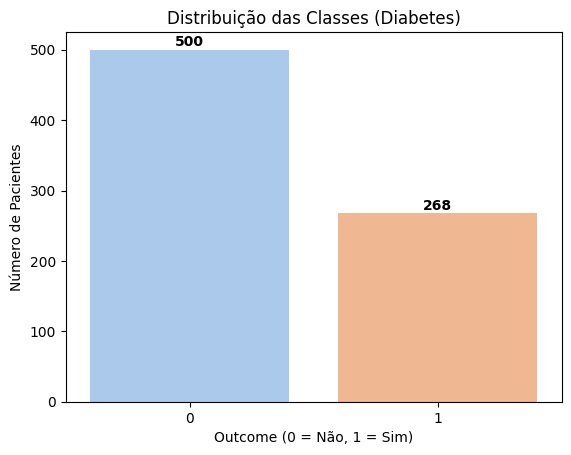

In [82]:


# Contagem das classes
sns.countplot(data=df, x='Outcome', hue='Outcome', palette='pastel', legend=False)
# Adiciona título e rótulos
plt.title('Distribuição das Classes (Diabetes)')
plt.xlabel('Outcome (0 = Não, 1 = Sim)')
plt.ylabel('Número de Pacientes')

# Exibir o valor em cima de cada barra
counts = df['Outcome'].value_counts()
for i, v in enumerate(counts):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.show()


#### Gerar `describe()` agrupado por `Outcome`


In [84]:
df.groupby('Outcome').describe()

Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   497.0   
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   266.0   

                     ... DiabetesPedigreeFunction           Age             \
               mean  ...                      75%    max  count       mean   
Outcome              ...                                                     
0        110.643863  ...                  0.56175  2.329  500.0  31.190000   
1        142.319549  ...                  0.72800  2.420  268.0  37.067164   

                                                  
               std   min   25%   50%   75%   max  
Outcome                                           
0        11.667655  21.0  23.0  27.0  37.0  81.0  
1        10.968254  21.0  28.0  36.0  44.0  70.0  

[2 rows x 64 columns]

#### Analisar como `Age`, `Glucose`, `BMI`, etc., se comportam entre diabéticos e não diabéticos

In [ ]:
# Estatísticas descritivas por grupo (tabela)
df.groupby('Outcome')[['Age', 'Glucose', 'BMI', 'BloodPressure', 'Insulin', 'SkinThickness']].mean()


,Age,Glucose,BMI,BloodPressure,Insulin,SkinThickness
Outcome,,,,,,
0,31.190000,110.643863,30.859674,70.877339,130.287879,27.235457
1,37.067164,142.319549,35.406767,75.321429,206.846154,33.000000


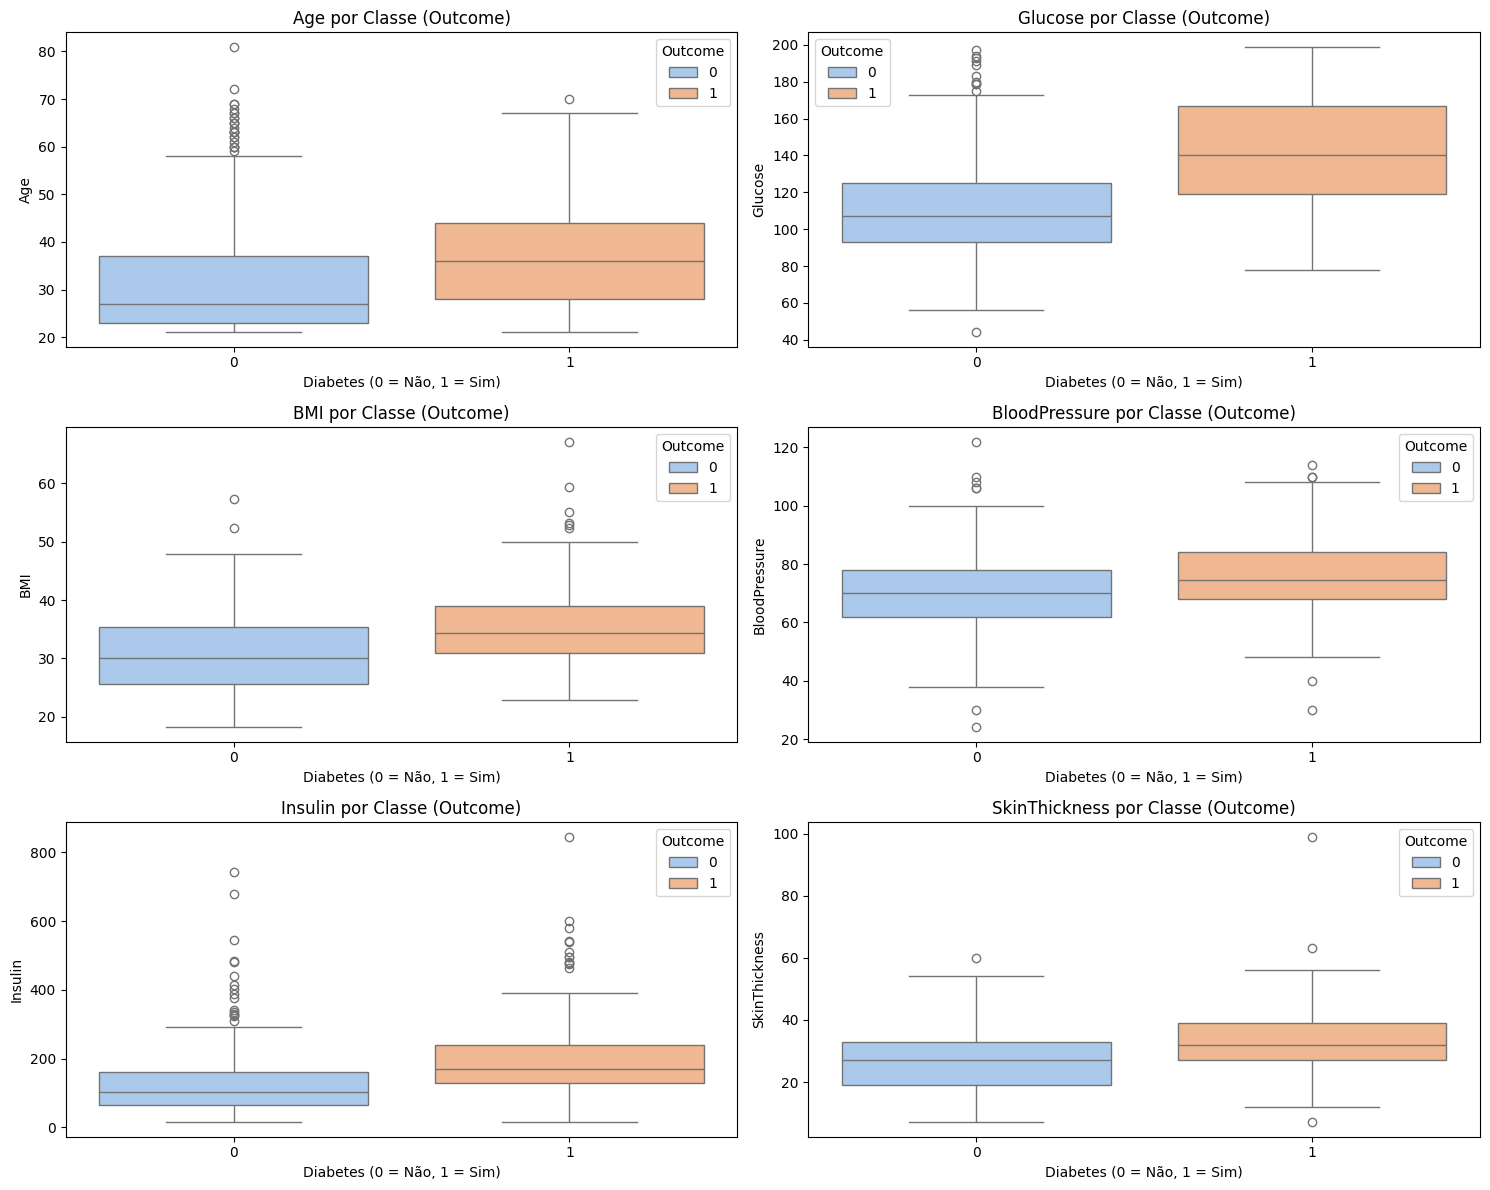

In [ ]:
#  Gráficos comparativos (distribuição por classe)
variaveis = ['Age', 'Glucose', 'BMI', 'BloodPressure', 'Insulin', 'SkinThickness']

plt.figure(figsize=(15, 12))

for i, col in enumerate(variaveis, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x='Outcome',  y=col,hue='Outcome', palette='pastel')
    plt.title(f'{col} por Classe (Outcome)')
    plt.xlabel('Diabetes (0 = Não, 1 = Sim)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

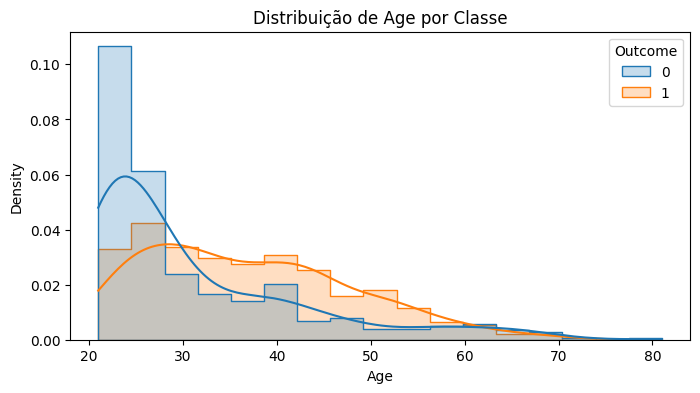

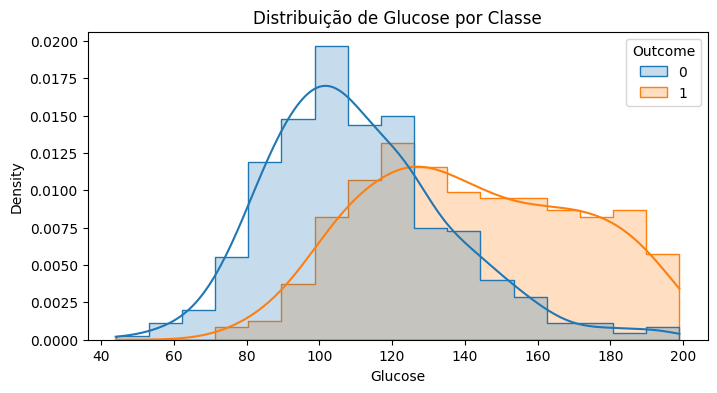

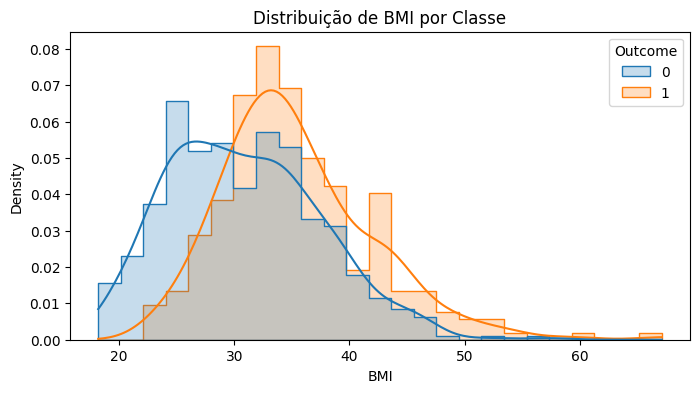

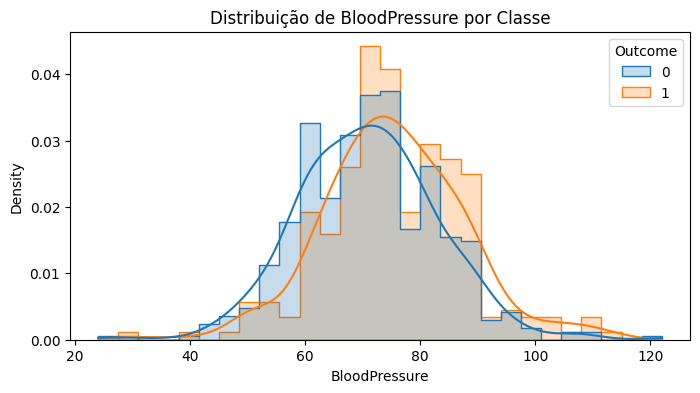

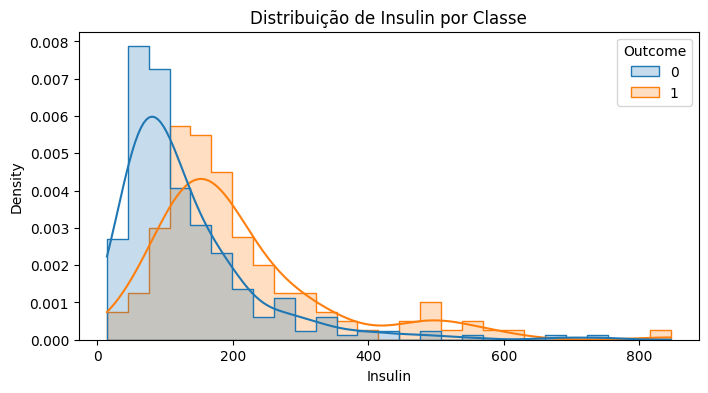

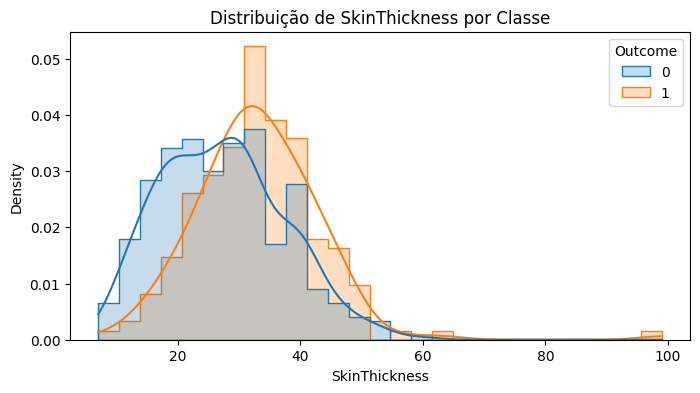

In [92]:
# Distribuições com sns.histplot
for col in ['Age', 'Glucose', 'BMI', 'BloodPressure', 'Insulin', 'SkinThickness']:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='Outcome', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribuição de {col} por Classe')
    plt.show()
